In [1]:
import sys
print(sys.version)

3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]


In [4]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
import scipy
import scipy.optimize
import time
import pandas as pd
import warnings

%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch
np.set_printoptions(suppress=True)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams['figure.figsize'] = (14, 10)

In [12]:
%load_ext autoreload
%autoreload 2

from pfs.utils.optimizeBlackDots import OptimizeBlackDots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# data of the cobras moving in run 1 and run 2
mcs_data_all_1 = np.load('/work/ncaplar/BlackDotsData/mcs_data_all_1.npy')
# take only 40 measurments - 41st was wrongly attached to this file
mcs_data_all_1 = mcs_data_all_1[:,:,:40]
mcs_data_all_2 = np.load('/work/ncaplar/BlackDotsData/mcs_data_all_2.npy')

# second run 
mcs_data_all_3 = np.load('/work/ncaplar/BlackDotsData/mcs_data_all_3.npy')
mcs_data_all_4 = np.load('/work/ncaplar/BlackDotsData/mcs_data_all_4.npy')

# third run 
mcs_data_all_5 = np.load('/work/ncaplar/BlackDotsData/mcs_data_all_5.npy')
mcs_data_all_6 = np.load('/work/ncaplar/BlackDotsData/mcs_data_all_6.npy')

# positions of the dots
dots = pd.read_pickle("/work/ncaplar/BlackDotsData/dots.pkl")
# original position of the cobras
# only needed for plotting 
getCobraGeometry_cobra_id = pd.read_pickle(
    "/work/ncaplar/BlackDotsData/getCobraGeometry_cobra_id.pkl")


In [40]:
# November run 
list_of_mcs_data_all = [mcs_data_all_1, mcs_data_all_2]
list_of_descriptions = ['theta','phi']
optimize_black_dots_instance_Nov = OptimizeBlackDots(dots, list_of_mcs_data_all, list_of_descriptions, outlier_distance=3.5)
dots_new_Nov = optimize_black_dots_instance_Nov.find_optimized_dots()

optimization_result_Nov = optimize_black_dots_instance_Nov.optimization_result
res_Nov = optimize_black_dots_instance_Nov.res

dots_new_Nov.to_pickle('/work/ncaplar/BlackDotsData/dots_new_Nov')

# load 
# df = pd.read_pickle(/work/ncaplar/BlackDotsData/dots_new_Nov)

/work/stack_INFRA-290/stack/miniconda3-4.5.12-1172c30/Linux64/pfs_utils/w.2022.08/python/pfs/utils/optimizeBlackDots.py:292: RuntimeWarning: invalid value encountered in less
  return np.hypot(x1, y1) < r


In [41]:
# January run 
list_of_mcs_data_all = [mcs_data_all_3, mcs_data_all_4]
list_of_descriptions = ['phi','theta']
optimize_black_dots_instance_Jan = OptimizeBlackDots(dots, list_of_mcs_data_all, list_of_descriptions, outlier_distance=3.5)
dots_new_Jan = optimize_black_dots_instance_Jan.find_optimized_dots()

optimization_result_Jan = optimize_black_dots_instance_Jan.optimization_result
res_Jan = optimize_black_dots_instance_Jan.res

dots_new_Jan.to_pickle('/work/ncaplar/BlackDotsData/dots_new_Jan')

In [42]:
# February run 
list_of_mcs_data_all = [mcs_data_all_5, mcs_data_all_6]
list_of_descriptions = ['theta','theta']
optimize_black_dots_instance_Feb = OptimizeBlackDots(dots, list_of_mcs_data_all, list_of_descriptions, outlier_distance=3.5)
dots_new_Feb = optimize_black_dots_instance_Feb.find_optimized_dots()

optimization_result_Feb = optimize_black_dots_instance_Feb.optimization_result
res_Feb = optimize_black_dots_instance_Feb.res

dots_new_Feb.to_pickle('/work/ncaplar/BlackDotsData/dots_new_Feb')

# Visualization of the result - examples

In [20]:
optimize_black_dots_instance = optimize_black_dots_instance_Nov
res = res_Nov

In [21]:
obs_and_predict_multi = optimize_black_dots_instance.obs_and_predict_multi

In [24]:
# non improved penalty
penalty_before = optimize_black_dots_instance.optimize_function([1,0,0,1,0,0])
print("penalty_before: "+str(penalty_before))
# penalty after improvent
penalty_after = optimize_black_dots_instance.optimize_function(res.x)
print("penalty_after: "+str(penalty_after))
dots_new = optimize_black_dots_instance.new_position_of_dots(*res.x)

penalty_before: 13989.0
penalty_after: 4358.0


In [25]:

# overload the msc data for plotting here
# for example for January run
# mcs_data_all_2  = mcs_data_all_3
# mcs_data_all_1  = mcs_data_all_4

mcs_data_all_2  = mcs_data_all_2
mcs_data_all_1  = mcs_data_all_1

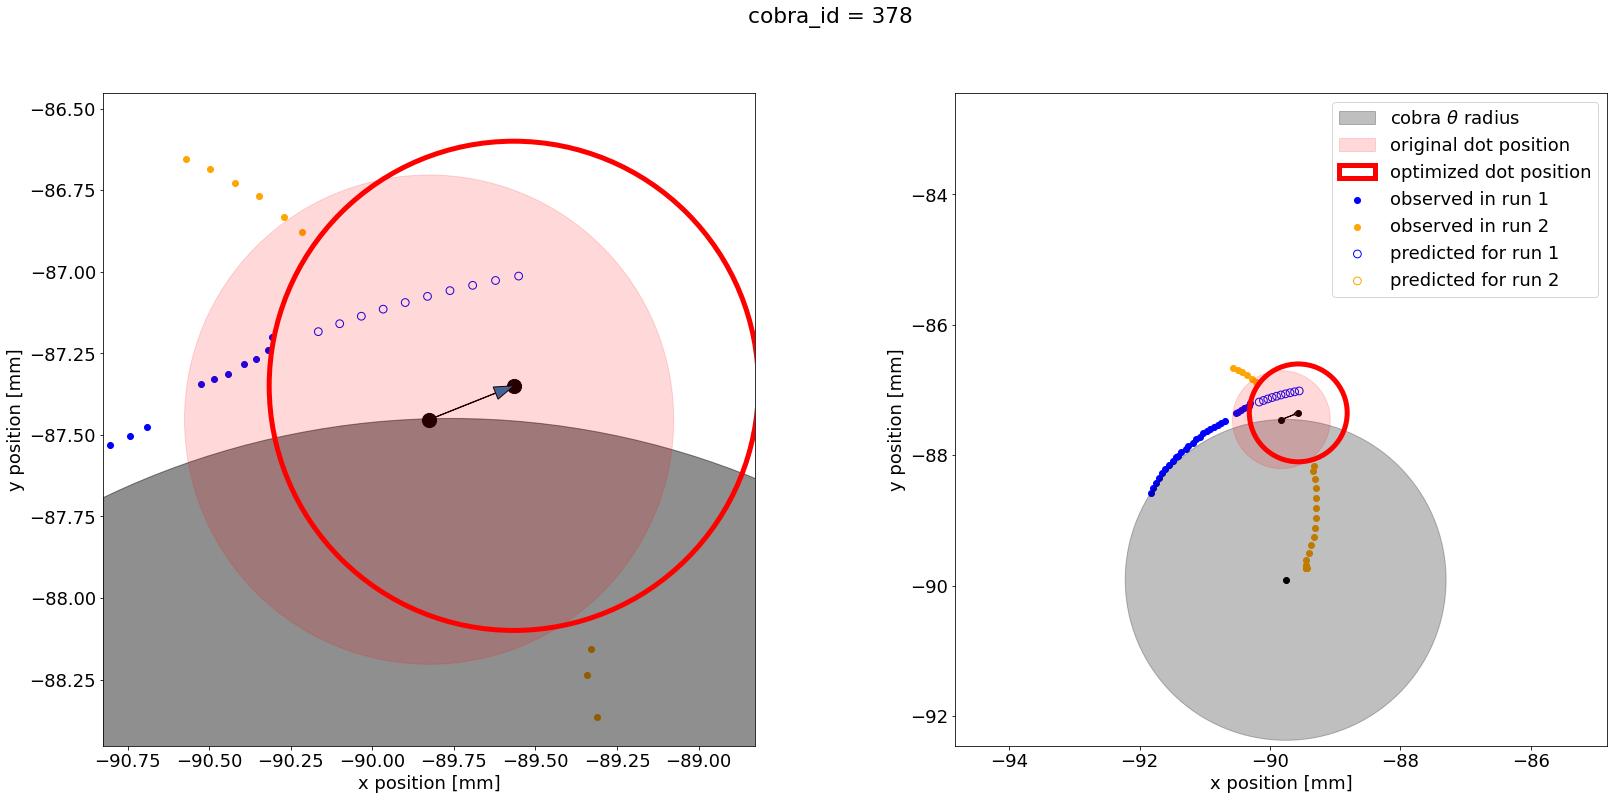

In [26]:
i=378

show_predictions = True
show_optimization = True


isGood_1 = obs_and_predict_multi[0][2][i].astype(bool)
isGood_2 = obs_and_predict_multi[1][2][i].astype(bool)

actual_position_x_1_observed = obs_and_predict_multi[0][0][i][isGood_1]
actual_position_y_1_observed = obs_and_predict_multi[0][1][i][isGood_1]
actual_position_x_2_observed = obs_and_predict_multi[1][0][i][isGood_2]
actual_position_y_2_observed = obs_and_predict_multi[1][1][i][isGood_2]

predicted_position_x_1_not_observed = obs_and_predict_multi[0][0][i][~isGood_1]
predicted_position_y_1_not_observed = obs_and_predict_multi[0][1][i][~isGood_1]
predicted_position_x_2_not_observed = obs_and_predict_multi[1][0][i][~isGood_2]
predicted_position_y_2_not_observed = obs_and_predict_multi[1][1][i][~isGood_2]

xd_original, yd_original = dots.iloc[i][['x','y']].values
xd_modified, yd_modified = dots_new.iloc[i][['x','y']].values

%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.facecolor"] = "white"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28,12))
fig.suptitle(f'cobra_id = {i}') 

data1 = ax1.scatter(mcs_data_all_1[0, i+1][:40], mcs_data_all_1[1, i+1][:40], color='blue', label='observed in run 1')
# ax1.plot(poly_deg_x_1(np.arange(0,40)), poly_deg_y_1(np.arange(0,40)), color='blue')
ax1.scatter(mcs_data_all_2[0, i+1][:40], mcs_data_all_2[1, i+1][:40], color='orange')
# ax1.plot(poly_deg_x_2(np.arange(0, len(y_measurments_2))), poly_deg_y_2(np.arange(0,len(y_measurments_2))), color='orange')

ax1.scatter(getCobraGeometry_cobra_id.loc[i+1]['center_x_mm'], getCobraGeometry_cobra_id.loc[i+1]['center_y_mm'], color = 'black')
cc_cobra = Circle((getCobraGeometry_cobra_id.loc[i+1]['center_x_mm'], getCobraGeometry_cobra_id.loc[i+1]['center_y_mm']), 
               getCobraGeometry_cobra_id.loc[i+1]['motor_theta_length_mm'], color='black' , alpha=0.25,label='theta radius')
ax1.add_artist(Circle((getCobraGeometry_cobra_id.loc[i+1]['center_x_mm'], getCobraGeometry_cobra_id.loc[i+1]['center_y_mm']), 
              getCobraGeometry_cobra_id.loc[i+1]['motor_theta_length_mm'], color='black' , alpha=0.25,label='theta radius'))
ax1.scatter(xd_original, yd_original, color='black',s=200)
if show_optimization:
    ax1.scatter(xd_modified, yd_modified, color='black',s=200)

cc_original = Circle((xd_original, yd_original), 0.75, color='red', alpha=0.15, label='original dot position')
cc_modified = Circle((xd_modified, yd_modified), 0.75, color='red' , alpha=1, label='optimized dot position', fill=False, lw=5)

ax1.set_aspect(1) 
ax1.add_artist(cc_cobra) 
ax1.add_artist(cc_original)
if show_optimization:
    ax1.add_artist(cc_modified) 

if show_predictions:
    ax1.scatter(predicted_position_x_1_not_observed, predicted_position_y_1_not_observed, s=60, facecolors='none', edgecolors='blue')
    ax1.scatter(predicted_position_x_2_not_observed, predicted_position_y_2_not_observed , s=60, facecolors='none', edgecolors='orange')
if show_optimization:
    ax1.arrow(xd_original, yd_original, xd_modified-xd_original, yd_modified-yd_original, head_width = 0.04, length_includes_head = True)

#ax1.title( 'cobra_id = ' + str(i) ) 
ax1.set_ylim(yd_original-1, yd_original+1)
ax1.set_xlim(xd_original-1, xd_original+1)
ax1.set_xlabel('x position [mm]')
ax1.set_ylabel('y position [mm]')

cc_cobra = Circle((getCobraGeometry_cobra_id.loc[i+1]['center_x_mm'], getCobraGeometry_cobra_id.loc[i+1]['center_y_mm']), 
              getCobraGeometry_cobra_id.loc[i+1]['motor_theta_length_mm'], color='black' , alpha=0.25, label=r'cobra $\theta$ radius')
cc_original = Circle((xd_original, yd_original), 0.75, color='red', alpha=0.15, label='original dot position')
cc_modified = Circle((xd_modified, yd_modified), 0.75, color='red' , alpha=1, label='optimized dot position', fill=False, lw=5)

ax2.scatter(getCobraGeometry_cobra_id.loc[i+1]['center_x_mm'], getCobraGeometry_cobra_id.loc[i+1]['center_y_mm'], color='black')
ax2.scatter(xd_original, yd_original, color='black')
if show_optimization:
    ax2.scatter(xd_modified, yd_modified, color='black')

ax2.set_aspect(1) 
ax2.add_artist(cc_cobra) 
ax2.add_artist(cc_original)
if show_optimization:
    ax2.add_artist(cc_modified) 

data1 = ax2.scatter(mcs_data_all_1[0, i+1][:40], mcs_data_all_1[1, i+1][:40], color='blue', label='observed in run 1')
# ax2.plot(poly_deg_x_1(np.arange(0,40)), poly_deg_y_1(np.arange(0,40)), color='blue')
data2 = ax2.scatter(mcs_data_all_2[0, i+1][:40], mcs_data_all_2[1, i+1][:40], color='orange', label='observed in run 2')
# ax2.plot(poly_deg_x_2(np.arange(0,len(y_measurments_2))), poly_deg_y_2(np.arange(0,len(y_measurments_2))), color='orange')
if show_predictions:
    predicted1 = ax2.scatter(predicted_position_x_1_not_observed, predicted_position_y_1_not_observed, s=60, facecolors='none', edgecolors='blue', label='predicted for run 1')
    predicted2 = ax2.scatter(predicted_position_x_2_not_observed, predicted_position_y_2_not_observed, s=60, facecolors='none', edgecolors='orange', label='predicted for run 2')

if show_optimization:
    ax2.arrow(xd_original, yd_original, xd_modified-xd_original, yd_modified-yd_original, head_width = 0.04, length_includes_head = True)

#plt.title( 'cobra_id = ' + str(i) ) 
ax2.set_ylim(yd_original-5, yd_original+5)
ax2.set_xlim(xd_original-5, xd_original+5)
ax2.set_xlabel('x position [mm]')
ax2.set_ylabel('y position [mm]')

ax2.legend(handles = [cc_cobra, cc_original, cc_modified, data1, data2, predicted1, predicted2])

In [27]:
# compare the optimized results with the non-optimized result
optimize_black_dots_instance.optimize_function([1., 0., 0., 1., 0., 0.])
list_of_total_penalty_for_single_dot_original = optimize_black_dots_instance.optimization_result
optimize_black_dots_instance.optimize_function(res.x)
list_of_total_penalty_for_single_dot_optimized = optimize_black_dots_instance.optimization_result

list_of_total_penalty_for_single_dot_original = np.sum(list_of_total_penalty_for_single_dot_original,axis=0)
list_of_total_penalty_for_single_dot_optimized = np.sum(list_of_total_penalty_for_single_dot_optimized
                                                        ,axis=0)
xd_original_test_dots_survived = dots['x']
yd_original_test_dots_survived = dots['y']

cmap = matplotlib.cm.get_cmap('jet')
colors_orignal = cmap(np.array(list_of_total_penalty_for_single_dot_original)/15)
colors_optimized  = cmap(np.array(list_of_total_penalty_for_single_dot_optimized)/15)
# overloading the definition for cmap
cmap = matplotlib.cm.get_cmap('bwr')
colors_difference=cmap(np.array(list_of_total_penalty_for_single_dot_original)/15-\
                           np.array(list_of_total_penalty_for_single_dot_optimized)/15+0.5)

Text(0.5, 1.0, 'Improvment due to optimization')

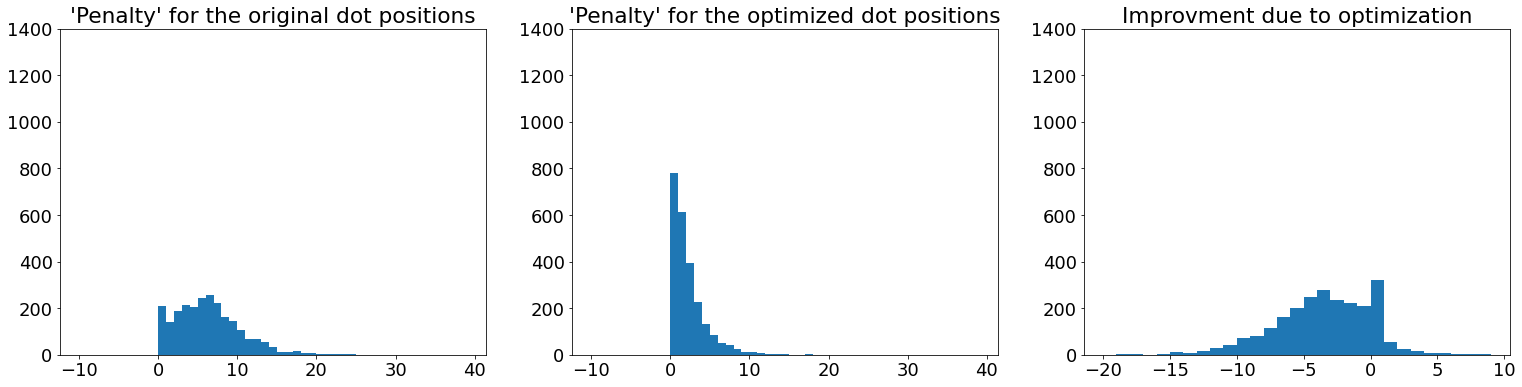

In [28]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.facecolor"] = "white"

figure, axes = plt.subplots(figsize=(26,6))
plt.subplot(131)
plt.hist(np.array(np.array(list_of_total_penalty_for_single_dot_original)),bins=np.arange(-10,40,1))
plt.title("'Penalty' for the original dot positions")
plt.ylim(0,1400)
plt.subplot(132)
plt.hist(np.array(list_of_total_penalty_for_single_dot_optimized),bins=np.arange(-10,40,1))
plt.title("'Penalty' for the optimized dot positions")
plt.ylim(0,1400)
plt.subplot(133)
plt.hist(-np.array(np.array(list_of_total_penalty_for_single_dot_original)
                           -np.array(list_of_total_penalty_for_single_dot_optimized)),bins=np.arange(-20,10,1))
plt.ylim(0,1400)
plt.title("Improvment due to optimization")
# in the final plot, on the right hand side,
# positive numbers are bad, negative values are good

Text(0.5, 0, 'x position [mm]')

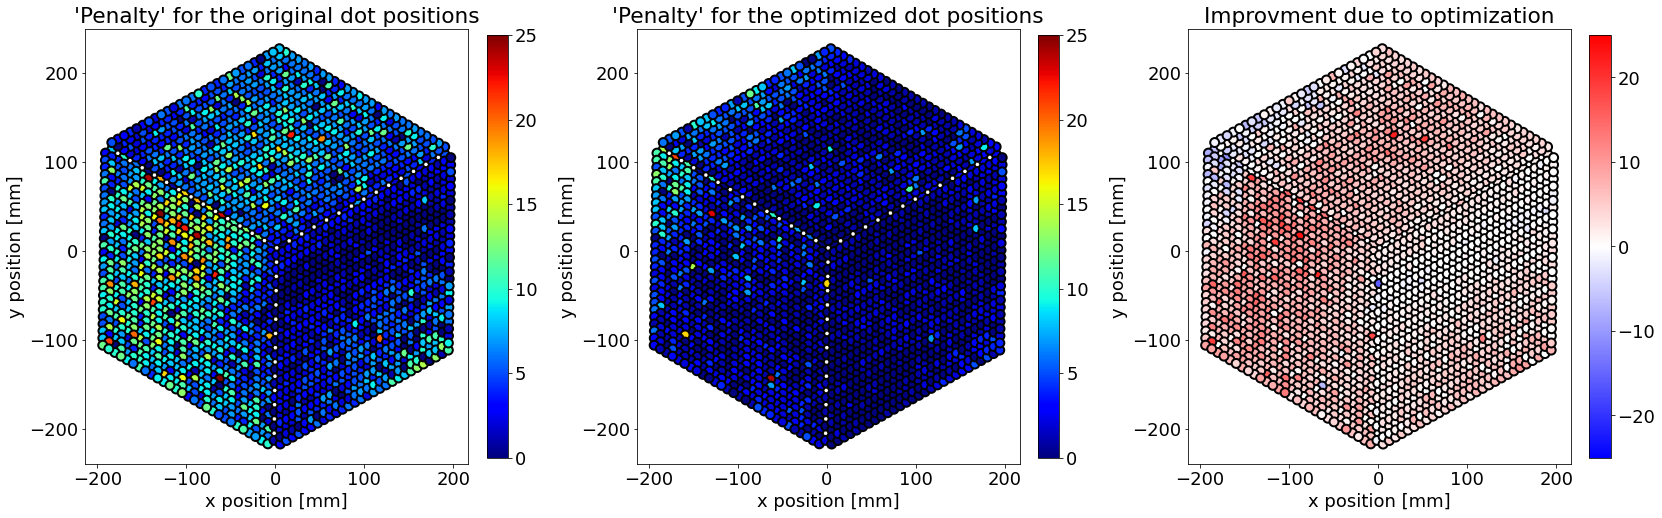

In [29]:
try:
    from collections.abc import Callable  # noqa
except ImportError:
    from collections import Callable  # noqa

%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.facecolor"] = "white"
figure = plt.figure(figsize=(28, 8))

plt.subplot(131)
plt.title("'Penalty' for the original dot positions")
sc = plt.scatter(xd_original_test_dots_survived, yd_original_test_dots_survived,
                 s=80, c=np.array(list_of_total_penalty_for_single_dot_original),
                 lw=2, edgecolors='black', cmap = matplotlib.cm.get_cmap('jet'), vmax=25)
plt.colorbar(sc, fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
plt.ylabel('y position [mm]')
plt.xlabel('x position [mm]')

plt.subplot(132)
plt.title("'Penalty' for the optimized dot positions")
sc2 = plt.scatter(xd_original_test_dots_survived, yd_original_test_dots_survived,
                  s=80, c=np.array(list_of_total_penalty_for_single_dot_optimized),
                  lw=2, edgecolors='black', cmap = matplotlib.cm.get_cmap('jet'), vmax=25)
plt.gca().set_aspect('equal')
plt.colorbar(sc2, fraction=0.046, pad=0.04)
plt.ylabel('y position [mm]')
plt.xlabel('x position [mm]')

plt.subplot(133)
plt.title("Improvment due to optimization")
sc3 = plt.scatter(xd_original_test_dots_survived, yd_original_test_dots_survived,
                  s=80, c=np.array(list_of_total_penalty_for_single_dot_original)/1-\
                  np.array(list_of_total_penalty_for_single_dot_optimized)/1, lw=2,
                  edgecolors='black', cmap=matplotlib.cm.get_cmap('bwr'), vmax=25, vmin=-25)
plt.gca().set_aspect('equal')
plt.colorbar(sc3, fraction=0.046, pad=0.04)
plt.ylabel('y position [mm]')
plt.xlabel('x position [mm]')

(-250.0, 250.0)

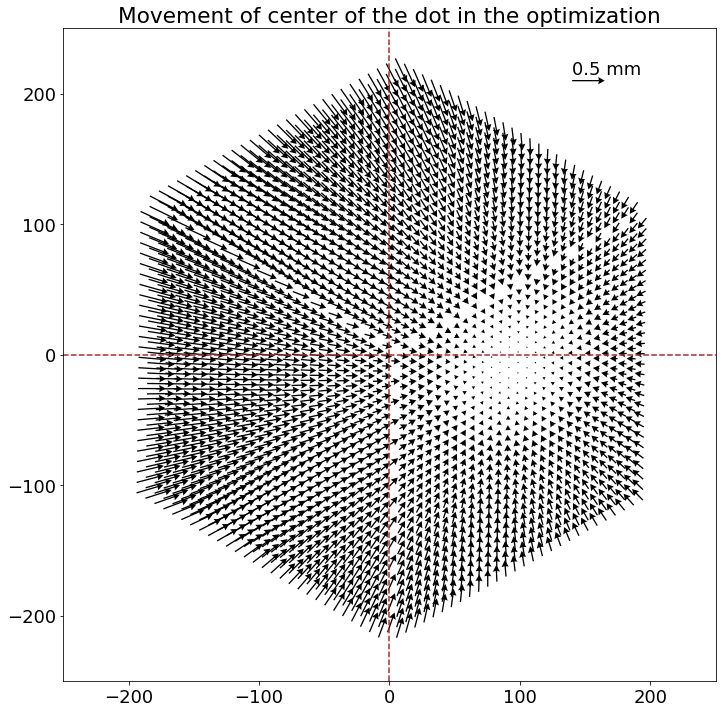

In [30]:
list_of_change = []
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.facecolor"] = "white"


xd_original = dots['x']
yd_original = dots['y']

xd_new = dots_new['x']
yd_new = dots_new['y']

list_of_change.append([np.array((xd_original, yd_original)),
                       np.array((xd_new, yd_new)) - np.array((xd_original, yd_original))])

array_of_change = np.array(list_of_change)

plt.rcParams["figure.facecolor"] = "white"
plt.figure(figsize=(12, 12))
plt.quiver(array_of_change[:, 0][:, 0], array_of_change[:, 0][:, 1], +array_of_change[:, 1][:, 0], array_of_change[:, 1][:, 1],
           units='width', angles='xy', scale_units='xy', scale=0.02, width=0.002, headwidth=5.5)

plt.quiver(140, 210, 0.5, 0,
           units='width', angles='xy', scale_units='xy', scale=0.02, width=0.002, headwidth=5.5)
plt.title("Movement of center of the dot in the optimization")
plt.text(140, 215, s='0.5 mm')
plt.axvline(0, color='brown', ls='--')
plt.axhline(0, color='brown', ls='--')
plt.gca().set_aspect('equal')

plt.xlim(-250,250)
plt.ylim(-250,250)